Details of Class Ionosphere 
Accuracy :  0.8301886792452831


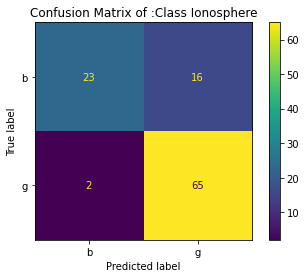

Precision of Each feature : 
0.92
0.8024691358024691
Overall precision :  0.8612345679012345
Recall of each feature : 
0.5897435897435898
0.9701492537313433
Overall Recall :  0.7799464217374665
False negative rate  : 
0.08
0.19753086419753085
Average FNR :  0.13876543209876543
False Positive rate  : 
0.41025641025641024
0.029850746268656716
Average FPR :  0.22005357826253347


Details of Indian Liver patient 
Accuracy :  0.6839080459770115


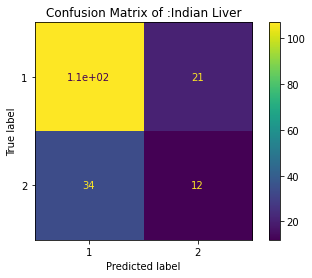

Precision of Each feature : 
0.7588652482269503
0.36363636363636365
Overall precision :  0.561250805931657
Recall of each feature : 
0.8359375
0.2608695652173913
Overall Recall :  0.5484035326086957
False negative rate  : 
0.24113475177304963
0.6363636363636364
Average FNR :  0.438749194068343
False Positive rate  : 
0.1640625
0.7391304347826086
Average FPR :  0.4515964673913043


Details of Iris 
Accuracy :  0.9555555555555556


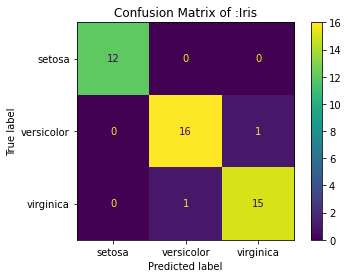

Precision of Each feature : 
1.0
0.9411764705882353
0.9375
Overall precision :  0.9595588235294118
Recall of each feature : 
1.0
0.9411764705882353
0.9375
Overall Recall :  0.9595588235294118
False negative rate  : 
0.0
0.058823529411764705
0.0625
Average FNR :  0.04044117647058824
False Positive rate  : 
0.0
0.058823529411764705
0.0625
Average FPR :  0.04044117647058824


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score


def split_data(X,Y):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
    return X_train,X_test,y_train,y_test

def model_mat(X_train,X_test,y_train,y_test,name):
    model = KNeighborsClassifier(n_neighbors=11)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    score = accuracy_score(y_test,predict)
    # print(type(predict))
    print('Accuracy : ',score)
    mat = confusion_matrix(y_test,predict)
    disp = plot_confusion_matrix(model,X_test,y_test)
    name = 'Confusion Matrix of :' + name
    disp.ax_.set_title(name)
    plt.show()
    return mat

# Precision = TruePositives / (TruePositives + FalsePositives)
def precision_conf(mat):
    n = mat.shape[0]
    num=0
    deno=0
    lst =[]
    for i in range(n):
        num = 0
        deno = 0
        num = mat[i,i]
        for j in range(n):
            deno = deno + mat[j,i]
        lst.append(num/deno)
    print("Precision of Each feature : ")
    avg = 0
    for i in range(len(lst)):
        print(lst[i])
        avg = avg + lst[i]
    print("Overall precision : ",avg/(len(lst)))    

# Recall = TruePositives / (TruePositives + FalseNegatives)
def recall_conf(mat):
    n = mat.shape[0]
    num=0
    deno=0
    lst =[]
    for i in range(n):
        num = 0
        deno = 0
        num = mat[i,i]
        for j in range(n):
            deno = deno + mat[i,j]
        lst.append(num/deno)
    print("Recall of each feature : ")
    avg = 0
    for i in range(len(lst)):
        print(lst[i])
        avg = avg + lst[i]
    # print("Overall Recall : ",avg/(len(lst)) 
    print("Overall Recall : ",avg/(len(lst)) )

# FNR = FN/FN+TP
def fnr(mat):
    n = mat.shape[0]
    num=0
    deno=0
    lst =[]
    for i in range(n):
        num = 0
        deno = 0
        num = mat[i,i]
        for j in range(n):
            deno = deno + mat[j,i]
        num = deno - num
        lst.append(num/deno)
    print("False negative rate  : ")
    avg = 0
    for i in range(len(lst)):
        print(lst[i])
        avg = avg + lst[i]
    print("Average FNR : ",avg/len(lst))    

# FPR = FP/FP+TN
def fpr(mat):
    n = mat.shape[0]
    num=0
    deno=0
    lst =[]
    for i in range(n):
        num = 0
        deno = 0
        num = mat[i,i]
        for j in range(n):
            deno = deno + mat[i,j]
        num = deno - num
        lst.append(num/deno)
    print("False Positive rate  : ")
    avg = 0
    for i in range(len(lst)):
        print(lst[i])
        avg = avg + lst[i]
    print("Average FPR : ",avg/len(lst))

def ionosphere():
    data = pd.read_csv(r"/content/5.Class_Ionosphere.csv")
    X = data.drop(['Class','RRD2'],axis=1)
    Y = data['Class']
    X_train,X_test,y_train,y_test = split_data(X,Y)
    print("Details of Class Ionosphere ")
    mat = model_mat(X_train,X_test,y_train,y_test,"Class Ionosphere")
    # print(mat) 
    precision_conf(mat)
    recall_conf(mat)
    fnr(mat)
    fpr(mat)
    
def indian_liver():
    data = pd.read_csv(r"/content/5.indian_liver_patient.csv",na_values=[''])
    data = data.dropna()
    X = data.drop(['Dataset'],axis=1)
    Y = data['Dataset']
    # print(X,Y)
    # print(data)
    X_train,X_test,y_train,y_test = split_data(X,Y)
    print("\n\nDetails of Indian Liver patient ")
    mat = model_mat(X_train,X_test,y_train,y_test,"Indian Liver")
    # print(mat) 
    precision_conf(mat)
    recall_conf(mat)
    fnr(mat)
    fpr(mat)

def iris():
    data = pd.read_csv(r"/content/5.iris.csv")
    X = data.drop(['species'],axis=1)
    Y = data['species']
    # print(X,Y)
    # print(data)
    X_train,X_test,y_train,y_test = split_data(X,Y)
    print("\n\nDetails of Iris ")
    mat = model_mat(X_train,X_test,y_train,y_test,"Iris")
    # print(mat) 
    precision_conf(mat)
    recall_conf(mat)
    fnr(mat)
    fpr(mat)

ionosphere()
indian_liver()
iris()